# EDA del dataset 'Accesos por Rangos'

## Librerías

### Librerías nativas

In [83]:
import os

### Librerías instaladas

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Extracción del dataset

Ruta actual.

In [85]:
ruta_actual = os.getcwd()

ruta_actual

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\notebooks'

Ruta raíz del proyecto.

In [86]:
ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_proyecto

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones'

Ruta del dataset a extraer.

In [87]:
ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'data', 
    'accesos_por_rangos.parquet'
    )

ruta_del_dataset

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\data\\accesos_por_rangos.parquet'

Se extrae el dataset.

In [88]:
accesos_por_rangos = pd.read_parquet(
    ruta_del_dataset, 
    engine='fastparquet'
    )

## Exploración del dataset

In [89]:
accesos_por_rangos

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014,1,La Rioja,10.0,5111.0,9390.0,1165.0,35.0,0.0,0.0,0.0,15711.0
996,2014,1,Mendoza,35.0,6.0,166655.0,19.0,10.0,6.0,9.0,0.0,166740.0
997,2014,1,Misiones,545.0,14460.0,52852.0,5139.0,958.0,0.0,0.0,0.0,73954.0
998,2014,1,Neuquén,4133.0,987.0,77148.0,84.0,1582.0,2.0,22.0,0.0,83958.0


In [90]:
accesos_por_rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


Sin duplicados.

In [91]:
accesos_por_rangos.duplicated(
    subset=['Año', 'Trimestre', 'Provincia']
    ).sum()

np.int64(0)

Unas pocas provincias tienen nulos en la columna 'Otros'. Esta columna será ignorada.

In [92]:
accesos_por_rangos[accesos_por_rangos['OTROS'].isna()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
481,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
491,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
492,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
499,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
502,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
503,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


## Comparación de rangos de velocidad de Internet a lo largo de los años

Se crea un nuevo dataframe con formato largo para poder graficar.

In [93]:
accesos_por_rangos_largo = pd.melt(
    accesos_por_rangos, 
    id_vars='Año', 
    value_vars=accesos_por_rangos.iloc[:, 3:10].columns, 
    var_name='Rangos de velocidad', 
    value_name='Accesos'
    )

Se crea un grafico de linea para mostrar las velocidades consumidas entre el 2014 y el 2024.

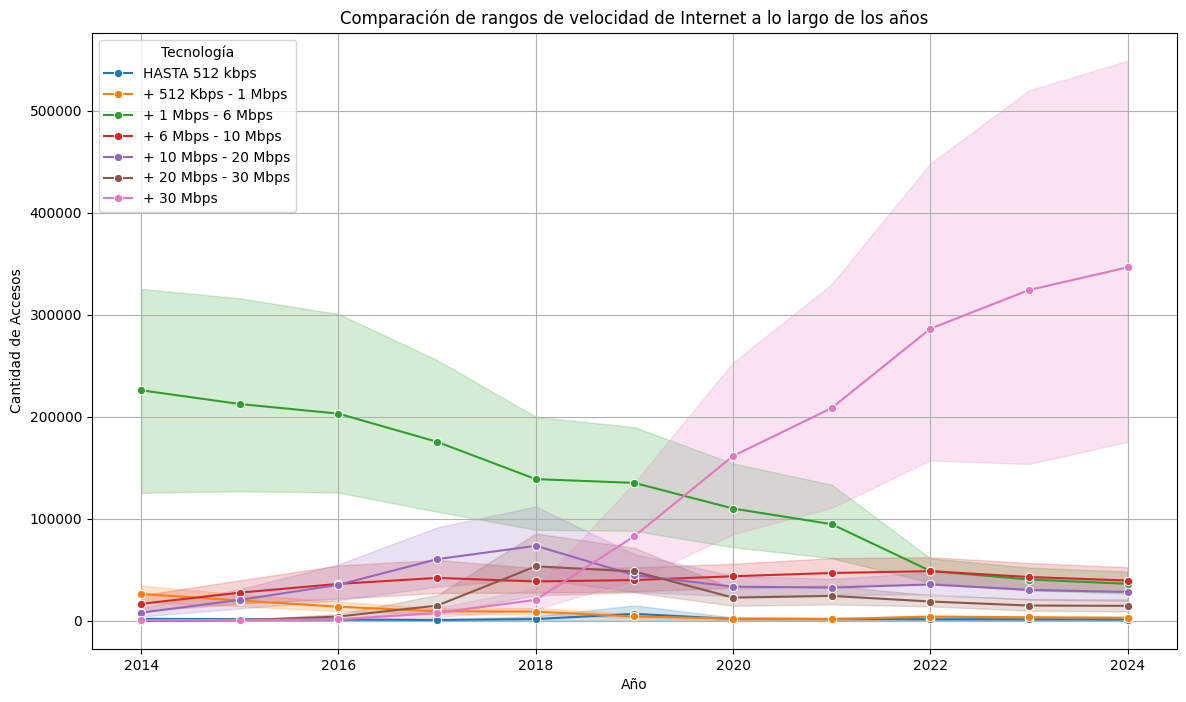

In [94]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=accesos_por_rangos_largo, 
    x='Año', 
    y='Accesos', 
    hue='Rangos de velocidad', 
    marker='o'
    )
plt.title('Comparación de rangos de velocidad de Internet a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()

### Análisis del gráfico:

El grafico muestra que hasta el año 2019 el rango mas consumido era el de + 1 Mbps - 6 Mbps. Mientras que a partir de 2020 fue superado por el rango de mas de 30 Mbps. 

A su vez el grafico indica que los rangos usados estan obsoletos. Esto es asi porque para 2022 la gran mayoria de los accesos tenian el rango + 30 Mbps.

Se recomienda actualizar los rangos para identificar el rango mas popular actualmente. En el año actual, 2024, muchas casa tienen conexión a internet de 50 o 100 Mbps. Incluso hay mayores.

## Comparación de rangos de velocidad sin los rangos + 1 Mbps - 6 Mbps ni + 30 Mbps

Se hace este nuevo grafico para ver mas en detalle el cambio de los otros rangos, a lo largo del tiempo.

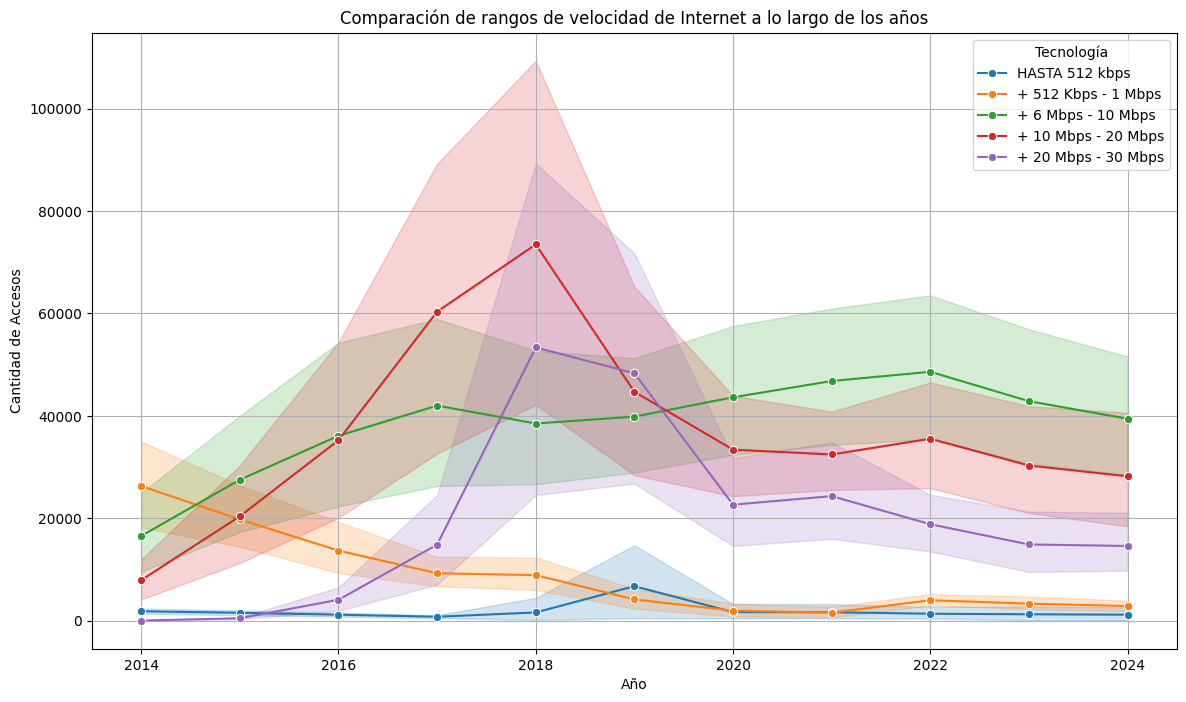

In [95]:
accesos_por_rangos_largo = pd.melt(
    accesos_por_rangos, 
    id_vars='Año', 
    value_vars=accesos_por_rangos.iloc[:, [3,4,6,7,8]].columns, 
    var_name='Rangos de velocidad', 
    value_name='Accesos'
    )

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=accesos_por_rangos_largo, 
    x='Año', 
    y='Accesos', 
    hue='Rangos de velocidad', 
    marker='o'
    )
plt.title('Comparación de rangos de velocidad de Internet a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()

### Análisis del gráfico

El gráfico muestra que en 2018 el rango + 10 Mbps - 20 Mbps era el mas popular de los seleccionados. Luego, seguido en segundo lugar, por el rango + 20 Mbps - 30 Mbps. 

Lo interesante es que en 2020 fueron superadas por el rango de menor velocidad + 6 Mbps - 10 Mbps. Esta tendencia continua hasta este año.

Estos rangos indican que las personas que los pagan actualmente podrian ser de bajos recursos y que por la relacion velocidad - precio prefieran el rango + 6 Mbps - 10 Mbps.

Concluyo que si se dividiera el rango + 30 Mbps en varios rangos se podria encontrar una relacion parecida: ni muy caro pero tampoco lento.

## Cantidad de accesos por provincia de mayor a menor del segundo trimestre del año 2024

Se obtienen los datos actualizados del segundo trimestre del 2024.

In [96]:
accesos_por_rangos[
    (accesos_por_rangos['Año'] == 2024) 
    & (accesos_por_rangos['Trimestre'] == 2)]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0
5,2024,2,Córdoba,103.0,7771.0,104023.0,84867.0,47180.0,27367.0,797600.0,16863.0,1085774.0
6,2024,2,Corrientes,67.0,2514.0,17264.0,15233.0,7058.0,2060.0,107094.0,5185.0,156475.0
7,2024,2,Entre Ríos,107.0,4123.0,33357.0,48933.0,15240.0,7220.0,171352.0,13979.0,294311.0
8,2024,2,Formosa,85.0,142.0,21748.0,10864.0,3989.0,290.0,25541.0,291.0,62950.0
9,2024,2,Jujuy,59.0,1213.0,11836.0,14148.0,28183.0,687.0,61615.0,1943.0,119684.0


In [97]:
año_2024_trimestre_2 = accesos_por_rangos[
    (accesos_por_rangos['Año'] == 2024) 
    & (accesos_por_rangos['Trimestre'] == 2)
    ].copy()

Los datos estan completos incluyendo las 23 provincias y la Capital Federal.

In [98]:
año_2024_trimestre_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  24 non-null     int64  
 1   Trimestre            24 non-null     int64  
 2   Provincia            24 non-null     object 
 3   HASTA 512 kbps       24 non-null     float64
 4   + 512 Kbps - 1 Mbps  24 non-null     float64
 5   + 1 Mbps - 6 Mbps    24 non-null     float64
 6   + 6 Mbps - 10 Mbps   24 non-null     float64
 7   + 10 Mbps - 20 Mbps  24 non-null     float64
 8   + 20 Mbps - 30 Mbps  24 non-null     float64
 9   + 30 Mbps            24 non-null     float64
 10  OTROS                24 non-null     float64
 11  Total                24 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 2.4+ KB


Se agrega una nueva columna llamada 'Porcentaje' para poder graficar el porcentaje de accesos por cada provincia.

In [99]:
año_2024_trimestre_2['Total'] = año_2024_trimestre_2['Total'].astype('int64')

In [100]:
año_2024_trimestre_2['Porcentaje'] = año_2024_trimestre_2['Total'] / año_2024_trimestre_2['Total'].sum()

In [101]:
año_2024_trimestre_2['Porcentaje']

0     0.431753
1     0.126652
2     0.006496
3     0.012729
4     0.015076
5     0.093957
6     0.013540
7     0.025468
8     0.005447
9     0.010357
10    0.010666
11    0.007570
12    0.026103
13    0.017874
14    0.014152
15    0.014887
16    0.017423
17    0.009172
18    0.013639
19    0.007222
20    0.080561
21    0.010844
22    0.005314
23    0.023097
Name: Porcentaje, dtype: float64

In [102]:
año_2024_trimestre_2 = año_2024_trimestre_2.sort_values(by='Porcentaje', ascending=False)

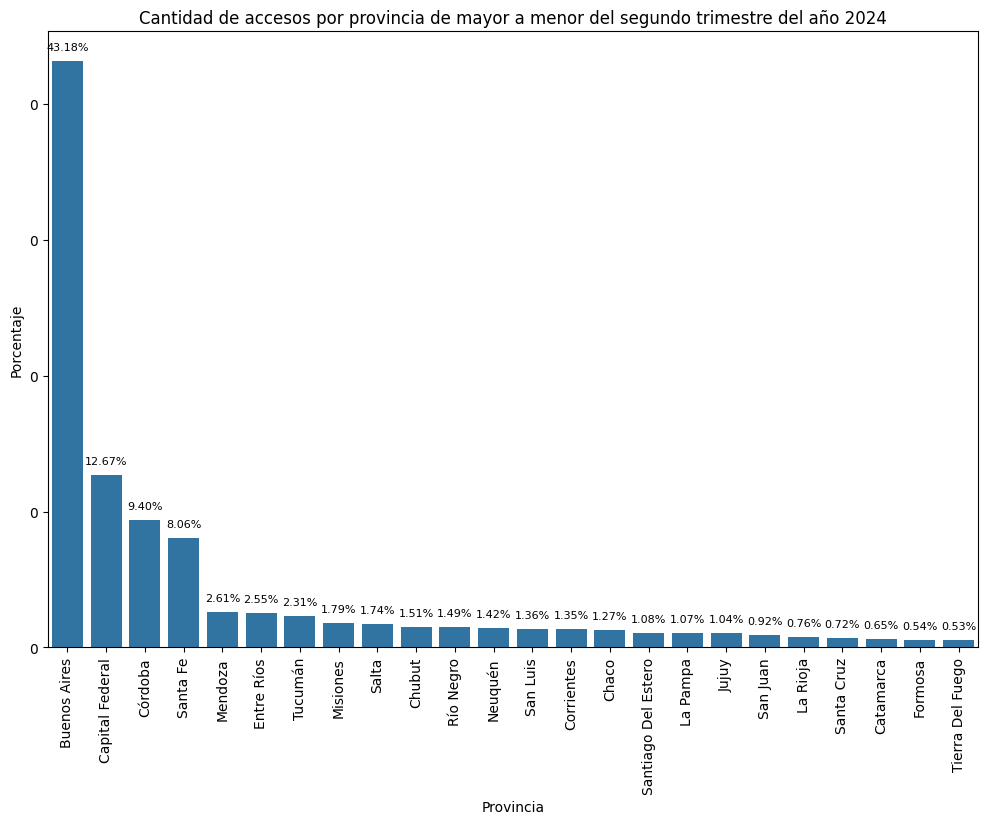

In [103]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Provincia', y='Porcentaje', data=año_2024_trimestre_2)
plt.title('Cantidad de accesos por provincia de mayor a menor del segundo trimestre del año 2024')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(
        lambda x, loc: "{:,}".format(int(x))
        )
    )
for p in ax.patches: 
    ax.annotate(
        f'{p.get_height():.2%}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points', 
        rotation=0, 
        fontsize=8
        )
plt.show()

### Análisis del gráfico

La provincia de Buenos Aires es, por lejos, la provincia con una mayor cantidad de accesos. Muy por detras, de mayor a menor, Capital Federal, Córdoba y Santa Fe que poseen una cantidad muy por encima de las demas provincias.

Estos datos indican que estas cuatro provincias, en especial Buenos Aires poseen mercados bastante grandes.

Se recomienda concentrar la campaña de publicidad en estas provincias.

## Provincias con mayores accesos

Se obtiene la provincia con la mayor cantidad de accesos. No se va a utilizar la columna porcentaje porque la funcion del grafico de torta lo hace automaticamente y para no agregar nuevos parametros a la funcion que lo compliquen demás.

In [104]:
buenos_aires = pd.DataFrame({
    'Provincia': ['Buenos Aires'], 
    'Total': [año_2024_trimestre_2.iloc[0]['Total']]
    })

buenos_aires

,Provincia,Total
0,Buenos Aires,4989380


Se suman la cantidad de accesos de las siguientes tres provincias en cantidad de accesos.

In [105]:
tres_mayores = pd.DataFrame({
    'Provincia': ['Capital Federal, Cordoba y Santa Fe'], 
    'Total': [año_2024_trimestre_2.iloc[1:4]['Total'].sum()]
    })

tres_mayores

,Provincia,Total
0,"Capital Federal, Cordoba y Santa Fe",3480346


Se suma la cantidad de accesos del resto de las provincias.

In [106]:
otros = pd.DataFrame({
    'Provincia': ['Otros'],
    'Total': [año_2024_trimestre_2.iloc[4:]['Total'].sum()]
})

otros

,Provincia,Total
0,Otros,3086381


Se juntan todos los dataframes.

In [107]:
df_final = pd.concat([buenos_aires, tres_mayores, otros])

In [108]:
df_final.sort_values(by='Total', ascending=True, inplace=True)

Se crea el grafico de torta.

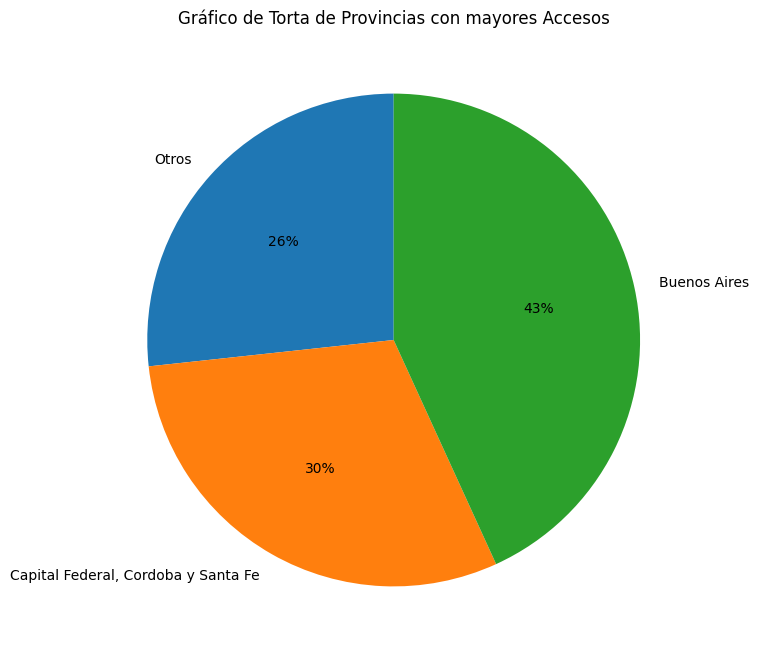

In [109]:
plt.figure(figsize=(8, 8))
plt.pie(
    df_final['Total'], 
    labels=df_final['Provincia'], 
    autopct='%d%%', 
    startangle=90
    )
plt.title('Gráfico de Torta de Provincias con mayores Accesos')
plt.show()

### Análisis del gráfico

Se ve claramente que la provincia de Buenos Aires tiene una mayor cantidad de accesos que las siguientes tres provincias que le siguen.

Las provincias de Buenos Aires, Capital Federal, Córdoba y Santa Fe suman un 73 % en la cantidad de accesos. Casi tres cuartas partes del mercado argentino. Esto es un indicativo de la importancia de estos cuatro mercados.

Se recomienda concentrarse en estos mercados empezando por Buenos Aires y luego por las siguientes tres provincias.